In [112]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
#merging processed file into raw merge file for further processing
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df = pd.read_csv(root / "data" / "processed" / "merged" / "parent_clean.csv", header=0)
df.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,...,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap,aggressive
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,...,0.800598,0.854956,8.662511,9.521707,67.596880,69.319600,22.941639,20.335337,-10.534279,0
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,...,1.051501,1.147173,9.708605,11.245602,80.071320,84.723694,20.737572,21.819538,3.903518,0
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,...,1.494703,1.494703,11.732657,24.616348,44.000920,105.462135,18.996666,29.467962,-2.147462,0
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,...,1.770240,1.770240,10.335592,17.929585,45.601433,57.610783,23.959110,21.440578,2.706697,0
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,...,1.698927,2.619599,11.501888,2.787075,74.401410,16.806042,91.713660,12.708904,18.208689,0


In [114]:
df.columns.tolist()

['is_ios',
 'source_file',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'speed_gap',
 'aggressive']

In [115]:
# columns to keep (with the earlier-dropped ones removed)
keep_cols = [
    'is_ios', 'source_file',
    'eventSensorDetectionMthd', 'eventGPSSignalStrength',
    'eventStartSpeed', 'eventEndSpeed',
    'memsMedianLateralAccel', 'memsP75LateralAccel', 'memsP95LateralAccel',
    'gyro_angular_change_per_second'
]

df = df[[c for c in keep_cols if c in df.columns]].copy()

# Coerce numerics (some files store numbers as strings)
num_cols = [c for c in df.columns if c not in ['source_file']]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

print("Columns kept:", df.columns.tolist())
print( df.shape)
n_before = len(df)

Columns kept: ['is_ios', 'source_file', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'memsMedianLateralAccel', 'memsP75LateralAccel', 'memsP95LateralAccel', 'gyro_angular_change_per_second']
(56784, 10)


eventSensorDetectionMthd

eventSensorDetectionMthd
2.0    29012
0.0    20462
1.0     7310
Name: count, dtype: int64
source_file        eventSensorDetectionMthd
android_turns.csv  2.0                           591
                   0.0                           315
                   1.0                           242
ios_turns.csv      2.0                         28421
                   0.0                         20147
                   1.0                          7068
Name: count, dtype: int64


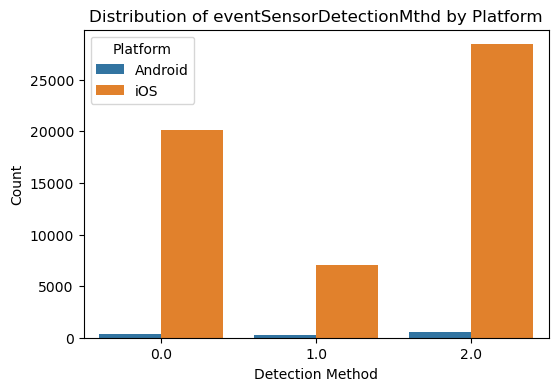

/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_

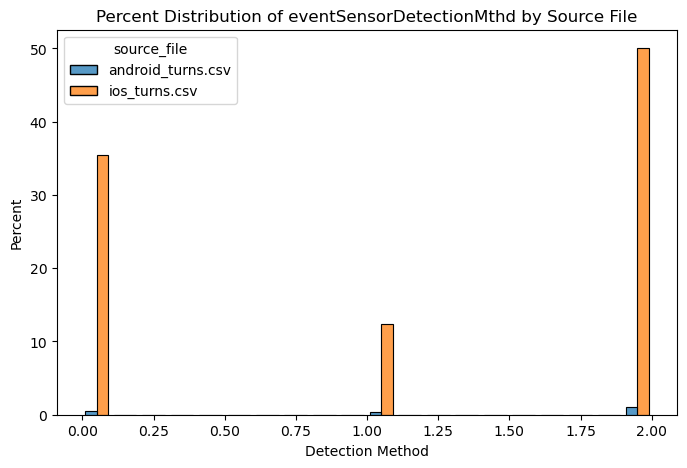

In [132]:
# frequency table
print(df['eventSensorDetectionMthd'].value_counts(dropna=False))
print(df.groupby("source_file")['eventSensorDetectionMthd'].value_counts())

# bar plot by iOS vs Android
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="eventSensorDetectionMthd",
    hue="is_ios"
)
plt.title("Distribution of eventSensorDetectionMthd by Platform")
plt.xlabel("Detection Method")
plt.ylabel("Count")
plt.legend(title="Platform", labels=["Android","iOS"])
plt.show()

# percent distribution within each source_file
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="eventSensorDetectionMthd",
    hue="source_file",
    stat="percent",
    multiple="dodge",  # side by side bars
    shrink=0.8
)
plt.title("Percent Distribution of eventSensorDetectionMthd by Source File")
plt.xlabel("Detection Method")
plt.ylabel("Percent")
plt.show()


eventGPSSignalStrength

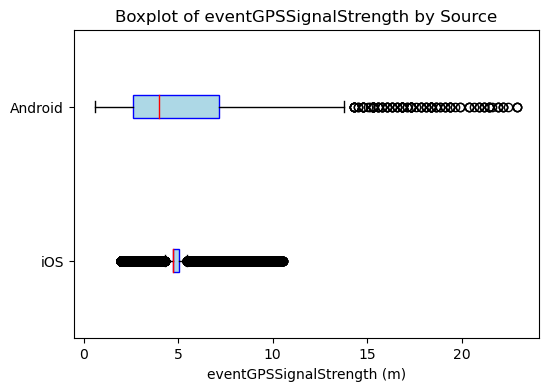

/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_

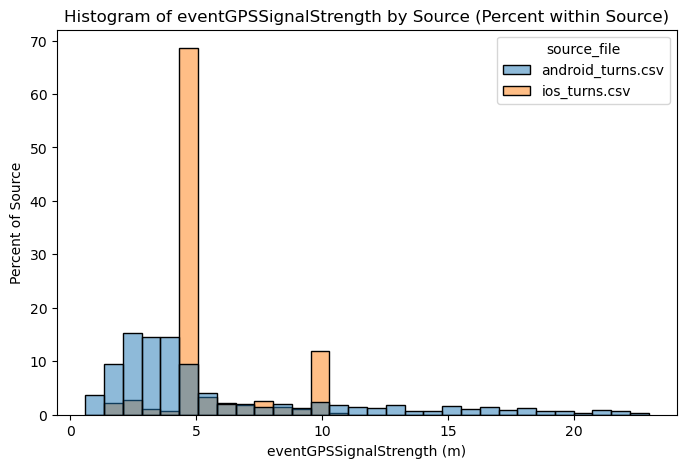

In [116]:
df.groupby("source_file")["eventGPSSignalStrength"].describe()

plt.figure(figsize=(6,4))
ios_data = df[df['is_ios'] == 1]['eventGPSSignalStrength']
android_data = df[df['is_ios'] == 0]['eventGPSSignalStrength']

plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength (m)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="eventGPSSignalStrength",
    hue="source_file",
    stat="percent",
    common_norm=False,
    bins=30,
    edgecolor="black"
)
plt.title("Histogram of eventGPSSignalStrength by Source (Percent within Source)")
plt.xlabel("eventGPSSignalStrength (m)")
plt.ylabel("Percent of Source")
plt.show()




In [117]:

df['eventGPSSignalStrength'].max()
df[df['eventGPSSignalStrength'] > 15]


,is_ios,source_file,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second
2,0,android_turns.csv,2.0,21.173470,11.229438,9.081976,3.568163,3.926081,4.297326,24.616348
3,0,android_turns.csv,1.0,15.306123,10.714942,13.421639,2.271535,2.956932,3.460920,17.929585
4,0,android_turns.csv,0.0,19.387754,2.729067,20.937756,0.487070,0.876652,1.500304,2.787075
7,0,android_turns.csv,1.0,19.387754,9.529365,10.491248,0.409031,0.662011,1.135946,11.777087
8,0,android_turns.csv,1.0,16.836735,8.478003,14.696693,0.275664,0.940116,2.070804,22.094933
...,...,...,...,...,...,...,...,...,...,...
1114,0,android_turns.csv,2.0,16.836735,20.624586,19.617962,1.561482,1.953157,2.315546,11.119814
1140,0,android_turns.csv,0.0,21.428572,6.487125,12.370276,4.316334,6.660520,7.973664,31.179829
1141,0,android_turns.csv,0.0,15.561224,13.555856,5.927890,0.933676,1.374108,2.099701,14.218071
1145,0,android_turns.csv,1.0,19.387754,28.319658,28.588089,0.344522,0.433849,0.619084,7.247447


eventStartSpeed =  the vehicle’s speed (mph) at the start of a turning event.

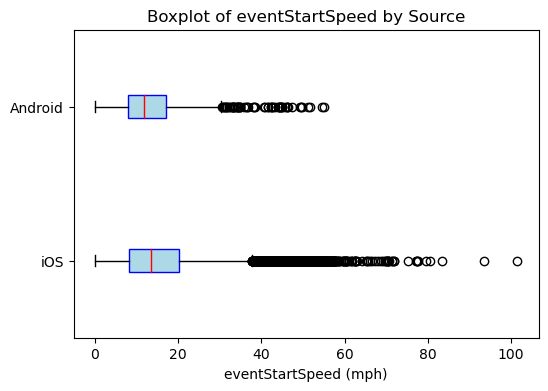

/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_

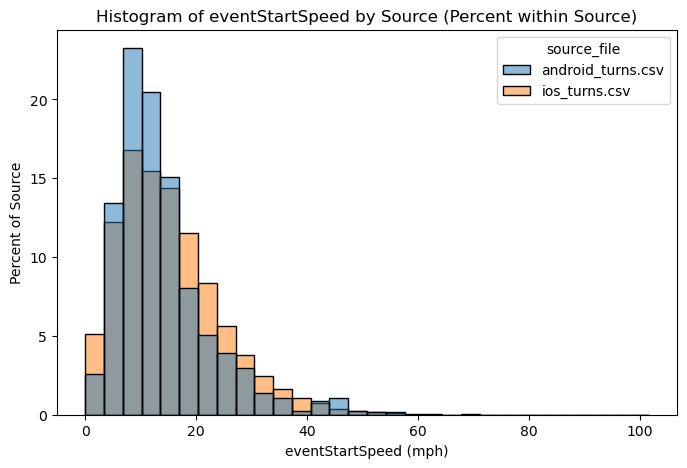

In [118]:
df.groupby("source_file")["eventStartSpeed"].describe()

plt.figure(figsize=(6,4))
ios_data = df[df['is_ios'] == 1]['eventStartSpeed']
android_data = df[df['is_ios'] == 0]['eventStartSpeed']

plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventStartSpeed by Source")
plt.xlabel("eventStartSpeed (mph)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="eventStartSpeed",
    hue="source_file",
    stat="percent",
    common_norm=False,
    bins=30,
    edgecolor="black"
)
plt.title("Histogram of eventStartSpeed by Source (Percent within Source)")
plt.xlabel("eventStartSpeed (mph)")
plt.ylabel("Percent of Source")
plt.show()



In [119]:
# # flag extremes
# df['eventStartSpeed'].max()
# # df[(df['eventStartSpeed'] < 0) | (df['eventStartSpeed'] > 120)]
# cap eventStartSpeed: negatives and >60 mph to NaN
df['eventStartSpeed'][(df['eventStartSpeed'] < 0) | (df['eventStartSpeed'] > 60)] = np.nan

df['eventStartSpeed'].describe()


/var/folders/8p/w527bs7s6md3y0q84ycs8p7r0000gn/T/ipykernel_20508/3795012959.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['eventStartSpeed'][(df['eventStartSpeed'] < 0) | (df['eventStartSpeed'] > 60)] = np.nan
/var/folders/8p/w527bs

count    56736.000000
mean        15.109704
std          9.153482
min          0.000000
25%          8.295322
50%         13.579220
75%         20.053486
max         59.873780
Name: eventStartSpeed, dtype: float64

eventEndSpeed

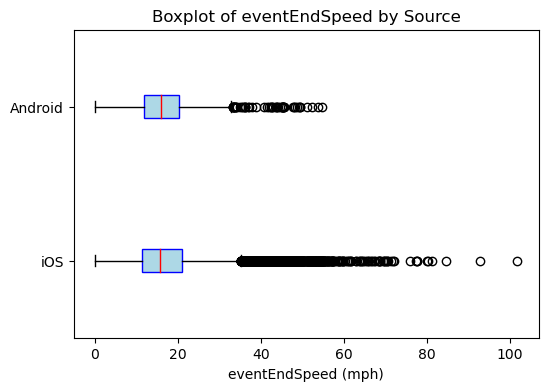

/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_

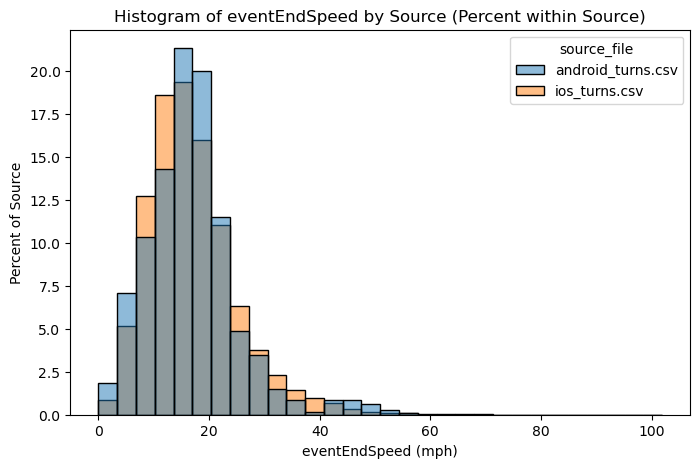

In [120]:
df.groupby("source_file")["eventEndSpeed"].describe()

plt.figure(figsize=(6,4))
ios_data = df[df['is_ios'] == 1]['eventEndSpeed']
android_data = df[df['is_ios'] == 0]['eventEndSpeed']

plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventEndSpeed by Source")
plt.xlabel("eventEndSpeed (mph)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="eventEndSpeed",
    hue="source_file",
    stat="percent",
    common_norm=False,
    bins=30,
    edgecolor="black"
)
plt.title("Histogram of eventEndSpeed by Source (Percent within Source)")
plt.xlabel("eventEndSpeed (mph)")
plt.ylabel("Percent of Source")
plt.show()




In [121]:
# cap eventEndSpeed: negatives and >50 mph to NaN
df['eventEndSpeed'][(df['eventEndSpeed'] < 0) | (df['eventEndSpeed'] > 50)] = np.nan

df['eventEndSpeed'].describe()


/var/folders/8p/w527bs7s6md3y0q84ycs8p7r0000gn/T/ipykernel_20508/1329034157.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['eventEndSpeed'][(df['eventEndSpeed'] < 0) | (df['eventEndSpeed'] > 50)] = np.nan
/var/folders/8p/w527bs7s6md3

count    56588.000000
mean        16.843100
std          7.733822
min          0.000000
25%         11.406576
50%         15.761668
75%         20.904938
max         49.998760
Name: eventEndSpeed, dtype: float64

memsMedianLateralAccel

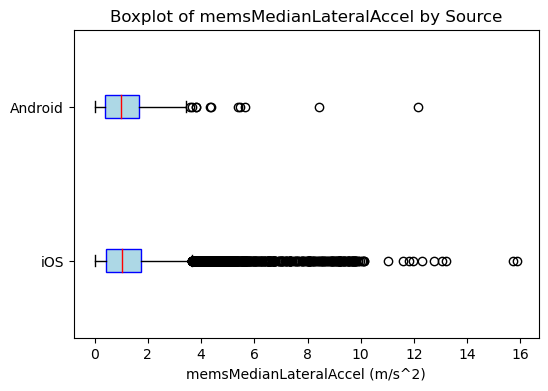

/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_

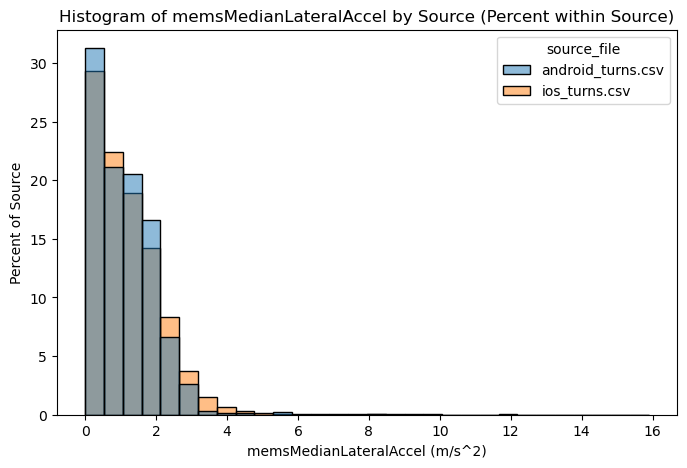

In [122]:
df.groupby("source_file")["memsMedianLateralAccel"].describe()

plt.figure(figsize=(6,4))
ios_data = df[df['is_ios'] == 1]['memsMedianLateralAccel']
android_data = df[df['is_ios'] == 0]['memsMedianLateralAccel']

plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of memsMedianLateralAccel by Source")
plt.xlabel("memsMedianLateralAccel (m/s^2)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="memsMedianLateralAccel",
    hue="source_file",
    stat="percent",
    common_norm=False,
    bins=30,
    edgecolor="black"
)
plt.title("Histogram of memsMedianLateralAccel by Source (Percent within Source)")
plt.xlabel("memsMedianLateralAccel (m/s^2)")
plt.ylabel("Percent of Source")
plt.show()




In [123]:
# cap memsMedianLateralAccel: <0 or >6 m/s^2 set to NaN
df['memsMedianLateralAccel'][(df['memsMedianLateralAccel'] < 0) | 
                             (df['memsMedianLateralAccel'] > 6)] = np.nan

df['memsMedianLateralAccel'].describe()


/var/folders/8p/w527bs7s6md3y0q84ycs8p7r0000gn/T/ipykernel_20508/1116379301.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['memsMedianLateralAccel'][(df['memsMedianLateralAccel'] < 0) |
/var/folders/8p/w527bs7s6md3y0q84ycs8p7r0000gn/

count    56573.000000
mean         1.169331
std          0.893022
min          0.000000
25%          0.438141
50%          1.012018
75%          1.716325
max          5.987754
Name: memsMedianLateralAccel, dtype: float64

memsP75LateralAccel

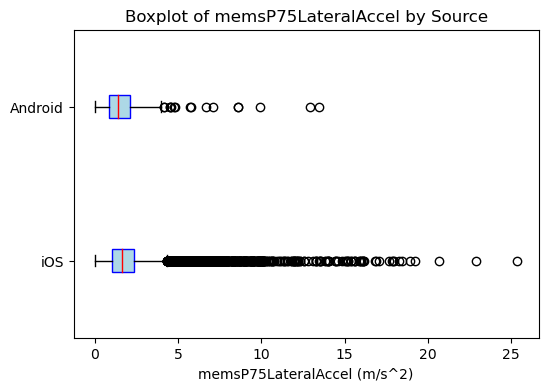

/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_

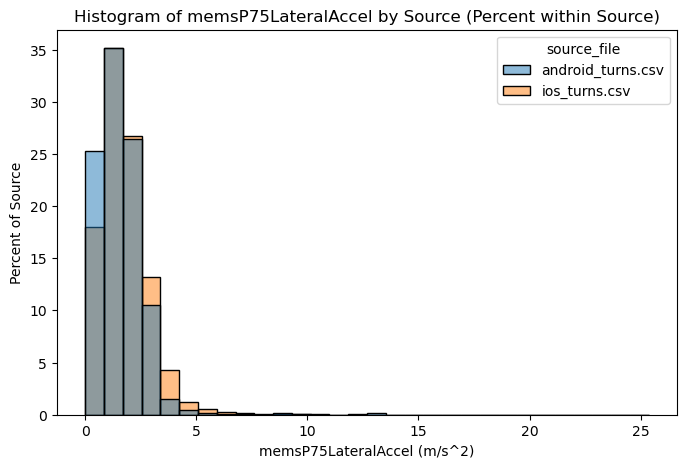

In [124]:
df.groupby("source_file")["memsP75LateralAccel"].describe()

plt.figure(figsize=(6,4))
ios_data = df[df['is_ios'] == 1]['memsP75LateralAccel']
android_data = df[df['is_ios'] == 0]['memsP75LateralAccel']

plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of memsP75LateralAccel by Source")
plt.xlabel("memsP75LateralAccel (m/s^2)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="memsP75LateralAccel",
    hue="source_file",
    stat="percent",
    common_norm=False,
    bins=30,
    edgecolor="black"
)
plt.title("Histogram of memsP75LateralAccel by Source (Percent within Source)")
plt.xlabel("memsP75LateralAccel (m/s^2)")
plt.ylabel("Percent of Source")
plt.show()




In [125]:
# flag extremes
df[(df['memsP75LateralAccel'] < 0) | (df['memsP75LateralAccel'] > 7)]

,is_ios,source_file,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second
64,0,android_turns.csv,0.0,10.714286,8.813542,4.540988,0.491934,9.927408,13.163021,39.642400
191,0,android_turns.csv,0.0,12.755102,5.502872,13.086099,5.472247,8.617292,11.020398,9.955097
293,0,android_turns.csv,0.0,9.183674,4.496249,5.994999,1.243189,7.082984,10.793810,5.022633
512,0,android_turns.csv,0.0,10.459184,4.787051,6.285801,NaN,8.621958,8.773016,3.957546
618,0,android_turns.csv,0.0,16.836735,9.059607,8.187200,NaN,12.912528,20.322845,26.661726
...,...,...,...,...,...,...,...,...,...,...
56319,1,ios_turns.csv,0.0,5.000000,4.833282,5.293594,NaN,8.762169,8.877989,1.995084
56487,1,ios_turns.csv,0.0,4.602844,20.020613,19.908766,NaN,7.972732,9.360403,4.042021
56519,1,ios_turns.csv,0.0,8.445137,8.727466,7.482775,0.731732,8.317948,8.724365,4.136760
56520,1,ios_turns.csv,0.0,8.895979,9.438302,10.854386,NaN,9.472557,9.757769,3.695000


memsP95LateralAccel

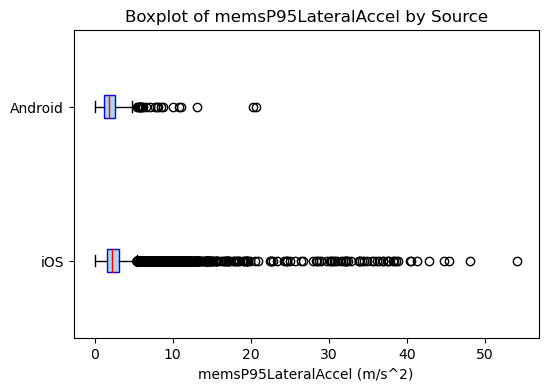

/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_

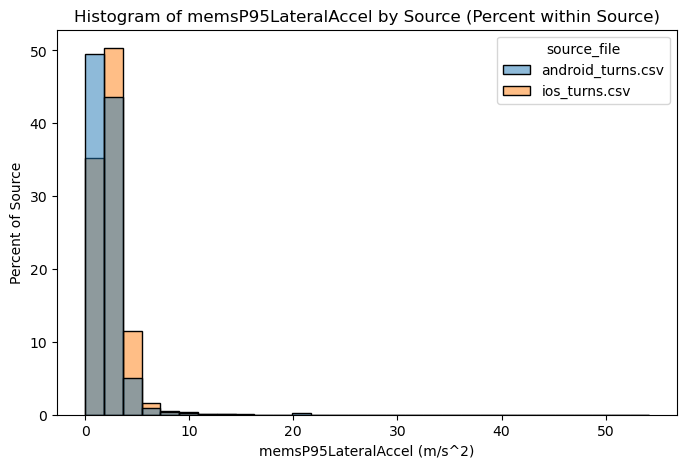

In [126]:
df.groupby("source_file")["memsP95LateralAccel"].describe()

plt.figure(figsize=(6,4))
ios_data = df[df['is_ios'] == 1]['memsP95LateralAccel']
android_data = df[df['is_ios'] == 0]['memsP95LateralAccel']

plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of memsP95LateralAccel by Source")
plt.xlabel("memsP95LateralAccel (m/s^2)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="memsP95LateralAccel",
    hue="source_file",
    stat="percent",
    common_norm=False,
    bins=30,
    edgecolor="black"
)
plt.title("Histogram of memsP95LateralAccel by Source (Percent within Source)")
plt.xlabel("memsP95LateralAccel (m/s^2)")
plt.ylabel("Percent of Source")
plt.show()




In [127]:
# cap memsP95LateralAccel: <0 or >8 m/s^2 set to NaN
df['memsP95LateralAccel'][(df['memsP95LateralAccel'] < 0) | 
                          (df['memsP95LateralAccel'] > 8)] = np.nan

df['memsP95LateralAccel'].describe()


/var/folders/8p/w527bs7s6md3y0q84ycs8p7r0000gn/T/ipykernel_20508/817485287.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['memsP95LateralAccel'][(df['memsP95LateralAccel'] < 0) |
/var/folders/8p/w527bs7s6md3y0q84ycs8p7r0000gn/T/ipyke

count    56217.000000
mean         2.370350
std          1.176881
min          0.009053
25%          1.500424
50%          2.212723
75%          3.044894
max          7.989641
Name: memsP95LateralAccel, dtype: float64

gyro_angular_change_per_second

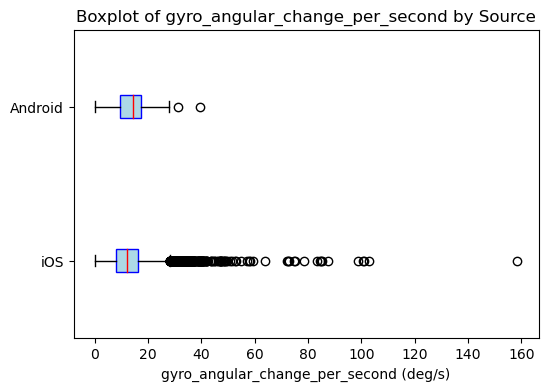

/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yuhuahuang/anaconda3/lib/python3.11/site-packages/seaborn/_

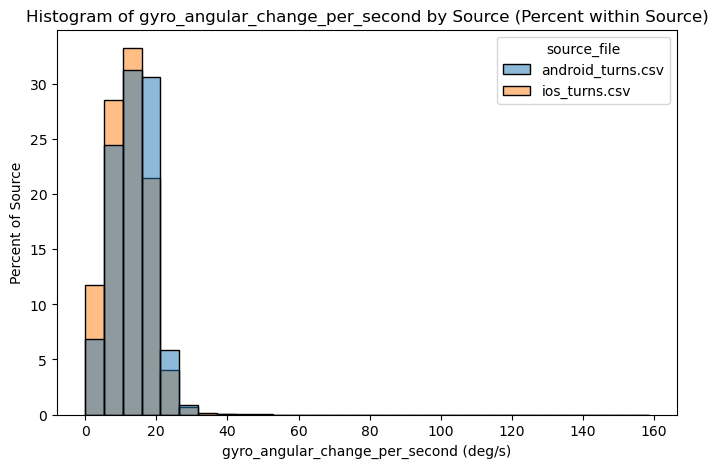

In [128]:
df.groupby("source_file")["gyro_angular_change_per_second"].describe()

plt.figure(figsize=(6,4))
ios_data = df[df['is_ios'] == 1]['gyro_angular_change_per_second']
android_data = df[df['is_ios'] == 0]['gyro_angular_change_per_second']

plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of gyro_angular_change_per_second by Source")
plt.xlabel("gyro_angular_change_per_second (deg/s)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="gyro_angular_change_per_second",
    hue="source_file",
    stat="percent",
    common_norm=False,
    bins=30,
    edgecolor="black"
)
plt.title("Histogram of gyro_angular_change_per_second by Source (Percent within Source)")
plt.xlabel("gyro_angular_change_per_second (deg/s)")
plt.ylabel("Percent of Source")
plt.show()



In [129]:
# cap gyro_angular_change_per_second: <0 or >50 deg/s set to NaN
df['gyro_angular_change_per_second'][
    (df['gyro_angular_change_per_second'] < 0) | 
    (df['gyro_angular_change_per_second'] > 50)
] = np.nan

df['gyro_angular_change_per_second'].describe()




/var/folders/8p/w527bs7s6md3y0q84ycs8p7r0000gn/T/ipykernel_20508/2081429147.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['gyro_angular_change_per_second'][
/var/folders/8p/w527bs7s6md3y0q84ycs8p7r0000gn/T/ipykernel_20508/2081429147

count    56758.000000
mean        12.167704
std          5.750708
min          0.003080
25%          8.084686
50%         12.209839
75%         16.133784
max         49.429012
Name: gyro_angular_change_per_second, dtype: float64

In [130]:
cols_to_check = [
    'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
    'eventSensorDetectionMthd', 'memsMedianLateralAccel', 'memsP75LateralAccel',
    'memsP95LateralAccel', 'gyro_angular_change_per_second'
]

df_clean = df.dropna(subset=cols_to_check)

n_after = len(df_clean)

print("Before:", n_before)
print("After :", n_after)
print("Dropped:", n_before - n_after)

Before: 56784
After : 55963
Dropped: 821
